In [10]:
import pandas as pd
from scipy.stats import linregress
# import plt
import matplotlib.pyplot as plt
import numpy as np

def generalized_linear_regression(X, Y, dY):
    """
    Generalized (weighted) linear regression with intercept.

    Model:
        Y = beta0 + beta1 * X + eps
        Cov(eps) = sigma^2 * D, where D = diag(dY^2)
    """

    X = np.asarray(X)
    Y = np.asarray(Y)
    dY = np.asarray(dY)
    n = len(Y)

    # Design matrix with intercept
    A = np.vstack([np.ones_like(X), X]).T  # n x 2

    # D^{-1} = diag(1 / dY^2)
    W = np.diag(1.0 / dY**2)

    # beta_hat = (A^T W A)^(-1) A^T W Y
    cov_beta = np.linalg.inv(A.T @ W @ A)
    beta_hat = cov_beta @ (A.T @ W @ Y)
    beta0, beta1 = beta_hat

    # residuals
    residuals = Y - A @ beta_hat

    # sigma^2_hat
    p = 2
    sigma2_hat = (residuals.T @ W @ residuals) / (n - p)

    # standard errors
    sde = np.sqrt(np.diag(cov_beta) * sigma2_hat)
    sde_beta0, sde_beta1 = sde

    # R^2 (weighted)
    Y_mean = np.average(Y, weights=1/dY**2)
    ss_tot = np.sum(((Y - Y_mean)**2) / dY**2)
    ss_res = np.sum((residuals**2) / dY**2)
    R2 = 1 - ss_res / ss_tot

    # Reduced chi^2
    chi2_red = ss_res / (n - p)

    # plotting
    plt.figure()
    plt.errorbar(X, Y, yerr=dY, fmt='o', label='data')
    xfit = np.linspace(np.min(X), np.max(X), 200)
    yfit = beta0 + beta1 * xfit
    plt.plot(xfit, yfit, 'r-', label='fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Weighted Linear Fit')
    plt.show()

    # Prediction function with uncertainty
    def predict(x_new):
        x_new = np.asarray(x_new)
        A_new = np.vstack([np.ones_like(x_new), x_new]).T
        y_pred = A_new @ beta_hat
        # prediction variance = sigma^2 * A_new (A^T W A)^(-1) A_new^T
        pred_var = sigma2_hat * np.sum(A_new @ cov_beta * A_new, axis=1)
        pred_err = np.sqrt(pred_var)
        return y_pred, pred_err

    return {
        "beta0": beta0,
        "beta1": beta1,
        "sde_beta0": sde_beta0,
        "sde_beta1": sde_beta1,
        "sigma2_hat": sigma2_hat,
        "R2": R2,
        "chi2_red": chi2_red,
        "predict": predict
    }

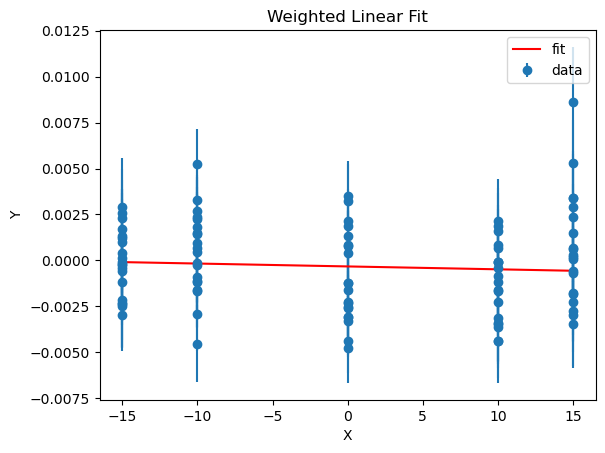

In [12]:
df = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.0431_0015.0432_0015.0433_0015.0434_0015.0435_.csv")
df["Magmar_Detuning"] = df['Magmar_AOM_Frequency'] - 79.0
x = df['Magmar_Detuning']
y = df['omega_NE']
dy = df['uncertainty_omega_NE']
res = generalized_linear_regression(x, y, dy)

In [13]:
res

{'beta0': -0.00032411045922800226,
 'beta1': -1.5708474940382303e-05,
 'sde_beta0': 0.00023899695574105206,
 'sde_beta1': 2.2179514018182584e-05,
 'sigma2_hat': 1.252997811092851,
 'R2': 0.00509237851605826,
 'chi2_red': 1.2529978110928512,
 'predict': <function __main__.generalized_linear_regression.<locals>.predict(x_new)>}

beta_0 (intercept): -2.1554e-04
beta_1 (slope): -7.9501e-06
Standard error of beta_0: 2.1439e-06
Standard error of beta_1: 2.1439e-05
R-squared: 0.0014


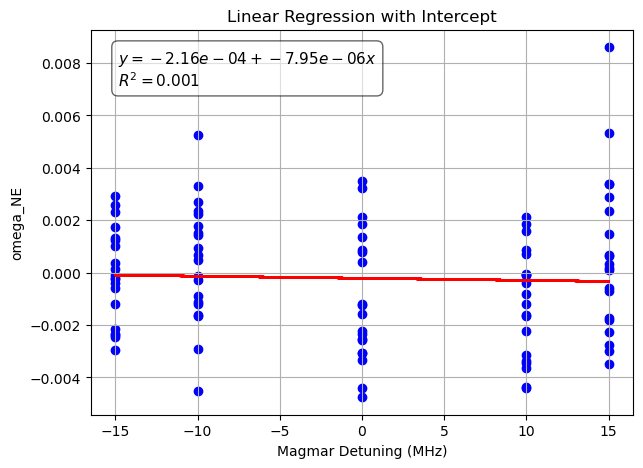

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err_slope = stats.linregress(x, y)

# Compute standard error of intercept manually
n = len(x)
mean_x = np.mean(x)
sxx = np.sum((x - mean_x) ** 2)
std_err_intercept = std_err_slope * np.sqrt(np.sum(x ** 2) / (n * sxx))

# Print results in scientific notation
print(f"beta_0 (intercept): {intercept:.4e}")
print(f"beta_1 (slope): {slope:.4e}")
print(f"Standard error of beta_0: {std_err_intercept:.4e}")
print(f"Standard error of beta_1: {std_err_slope:.4e}")
print(f"R-squared: {r_value**2:.4f}")

# Plot data and regression line
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', label='Observed data')
plt.plot(x, intercept + slope * x, color='red', label='Fitted line')

# Add regression equation and R^2 on the plot
eq_text = f"$y = {intercept:.2e} + {slope:.2e}x$\n$R^2 = {r_value**2:.3f}$"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.6))

plt.xlabel('Magmar Detuning (MHz)')
plt.ylabel('omega_NE')
plt.title('Linear Regression with Intercept')
plt.grid(True)
plt.show()


$$
\frac{\partial \omega ^{NE}}{\partial \Delta _{Magmar}}=-7.95\pm 21.4 \mu rad/s/MHz
\\
d\omega ^{NE}=\sqrt{d\left( \frac{\partial \omega ^{NE}}{\partial \Delta _{Magmar}} \right) ^2+\left( \frac{\partial \omega ^{NE}}{\partial \Delta _{Magmar}} \right)}\Delta _{Magmar}
\\
=22.83 \Delta _{Magmar}\,\,\mu rad/s
\\
Take\,\,\Delta _{Magmar}=0.3MHz,
\\
\delta \omega _{NE, \Delta Magmar}=6.8\mu rad/s
$$


In [6]:

def generalized_linear_regression(X, Y, dY):
    """
    Generalized (weighted) linear regression with intercept.

    Model:
        Y = beta0 + beta1 * X + eps
        Cov(eps) = sigma^2 * D, where D = diag(dY^2)
    """

    X = np.asarray(X)
    Y = np.asarray(Y)
    dY = np.asarray(dY)
    n = len(Y)

    # Design matrix with intercept
    A = np.vstack([np.ones_like(X), X]).T  # n x 2

    # D^{-1} = diag(1 / dY^2)
    W = np.diag(1.0 / dY**2)

    # beta_hat = (A^T W A)^(-1) A^T W Y
    cov_beta = np.linalg.inv(A.T @ W @ A)
    beta_hat = cov_beta @ (A.T @ W @ Y)
    beta0, beta1 = beta_hat

    # residuals
    residuals = Y - A @ beta_hat

    # sigma^2_hat
    p = 2
    sigma2_hat = (residuals.T @ W @ residuals) / (n - p)

    # standard errors
    sde = np.sqrt(np.diag(cov_beta) * sigma2_hat)
    sde_beta0, sde_beta1 = sde

    # R^2 (weighted)
    Y_mean = np.average(Y, weights=1/dY**2)
    ss_tot = np.sum(((Y - Y_mean)**2) / dY**2)
    ss_res = np.sum((residuals**2) / dY**2)
    R2 = 1 - ss_res / ss_tot

    # Reduced chi^2
    chi2_red = ss_res / (n - p)

    # plotting
    plt.figure()
    plt.errorbar(X, Y, yerr=dY, fmt='o', label='data')
    xfit = np.linspace(np.min(X), np.max(X), 200)
    yfit = beta0 + beta1 * xfit
    plt.plot(xfit, yfit, 'r-', label='fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Weighted Linear Fit')
    plt.show()

    # Prediction function with uncertainty
    def predict(x_new):
        x_new = np.asarray(x_new)
        A_new = np.vstack([np.ones_like(x_new), x_new]).T
        y_pred = A_new @ beta_hat
        # prediction variance = sigma^2 * A_new (A^T W A)^(-1) A_new^T
        pred_var = sigma2_hat * np.sum(A_new @ cov_beta * A_new, axis=1)
        pred_err = np.sqrt(pred_var)
        return y_pred, pred_err

    return {
        "beta0": beta0,
        "beta1": beta1,
        "sde_beta0": sde_beta0,
        "sde_beta1": sde_beta1,
        "sigma2_hat": sigma2_hat,
        "R2": R2,
        "chi2_red": chi2_red,
        "predict": predict
    }